<h2 align="center">Intro to Data Science</h2> 
<h3 align="center">Project 1: ANOVA analysis</h3> 

<h3 align="center">Chunwang Yuan, Rajendra Kumar Vechalapu, Saketh Yelamarthi<br>Fall 2021</h3> 

<center>


### Outline
1. Abstract
2. Theory
3. Exploratory Data analysis
4. Analysis Results & Explanation
5. Conclusion

###  1 Abstract 
The main aim of this project is to perform One-Way ANOVA analysis on the given set of data(values in various levels of education) using python. We build a model that outputs the summary and gives anova table. We set hypothesis for the given data and calculate F-statistic. From F-statistic, p-value is calculated. If the p-value is less than significance level, we reject Null hypothesis which refers to that means of all groups are not equal and the observed difference in the means is not due to sampling variability. After performing hypothesis test, we perform multiple pairwise comparisons of different groups using t-test to determine which means are different. In conclusion, we determine whether the mean of various levels of education is same or which levels of education have different means.

### 2 Theory
Analysis of Variance(ANOVA) is used to compare the means of two or more groups to check whether they are different or not. It is used when there are more than two groups present in the dataset. If there is one independent variable then one-way anova is used. If there are two independent variables then two-way anova is used. 

A one-way anova has a single factor with different treatments and many samples at each level. We can calculate the mean of the samples of each treatment. The residuals show the variation within each treatment. A total mean is obtained by taking the average of means of all treatments. Then we can check the deviation of the mean of each treatment from total mean. And therefore, we can check the variation within each treatment to the variation across the treatments. So it is called Analysis of Variance. 

In ANOVA, we use F-statistic, where it is defined by variability between groups(treatments) over variability within groups. Larger F-statistic produces smaller p-value. So, in order to reject Null Hypothesis, we need small p-value. For that to obtain, variability between group  means needs to be greater than the variability within group means.

An ANOVA table consists of degees of freedom, sum of squares of group which measures the variability between groups, sum of squares of error(residual) which measure the variability within groups, the mean square error which is calculated as sum of squares divided by the degrees of freedom, F-score and p-value.

Before performing ANOVA analysis, there are certain conditions that need to be met:

1. The samples should be independent within and between groups.

2. The samples within each group should be nearly normal. To check for normality, here we use    Shapiro-Wilk test.

3. The variability across the groups should be approximately equal. To check for Homogeneity    for equal variances, here we use Bartlett's test and Levene's test.

The given data set has information regarding means(values) of various levels of education. The hypothesis for the given dataset is as follows:

1. Null Hypothesis: The average values of different levels of education    i.e., Less than High School, High School, Junior College, Bachelor's and Graduate are same.

2. Alternate Hypothesis: The average number in various levels of education are different.

After performing Hypothesis test, if the p-value is less than significance level, we reject Null Hypothesis and perform multiple pairwise comparisons using t-test and determine which pair of levels have different means. 

### 3 Exploratory Data analysis
#### In this section, we  use the method of One-way Anova to explorate the data 

In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
from statsmodels.formula.api import ols

#### Firstly, we load the data as the dataframe type set. 

In [4]:
data = pd.read_csv('DSCI6002_prj1_data.csv', header = None)
data_array = np.array(data)
df = pd.DataFrame(data_array ,columns = ['treatments','value'])
print(df.dtypes)
df.head()

treatments    object
value         object
dtype: object


,treatments,value
0,Less than HS,45
1,Less than HS,26
2,Less than HS,43.8
3,Less than HS,34.4
4,Less than HS,76.2


#### Since the data type of the column of 'value' is object, we need to convert the value from object to numeric.

In [4]:
# convert the value column to numeric type
df['value'] = pd.to_numeric(df['value'])
df.dtypes

treatments     object
value         float64
dtype: object

In [5]:
model = ols('value~C(treatments)', data = df ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.619
Date:                Thu, 18 Nov 2021   Prob (F-statistic):            0.00106
Time:                        15:53:06   Log-Likelihood:                -4837.1
No. Observations:                1172   AIC:                             9684.
Df Residuals:                    1167   BIC:                             9709.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        42.2032      0.945     44.648      0.000      40.349      44.058
C(treatments)[T.Graduate]         1.4968      1.534      0.976      0.329      -1.512       4.506
C(treatments)[T.HS]              -2.0975      1.143     -1.834      0.067      -4.341       0.146
C(treatments)[T.Jr Coll]         -1.0063      1.796     -0.560      0.575      -4.529       2.517
C(treatments)[T.Less than HS]    -5.5668      1.662     -3.350      0.001      -8.827      -2.306
==============================================================================
Omnibus:                        0.432   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.513
Skew:                           0.028   Prob(JB):                        0.774
Kurtosis:                       2.914   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### by implementing the method of One-way Anova to the model, we can get the parameters. 

In [6]:
### One-way ANOVA 
anova_table = sm.stats.anova_lm(model,typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),4176.452688,4.0,4.618904,0.001056
Residual,263802.838942,1167.0,NaN,NaN


In [7]:
esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
anova_table['EtaSq'] = [esq_sm,'NaN']
anova_table

,sum_sq,df,F,PR(>F),EtaSq
C(treatments),4176.452688,4.0,4.618904,0.001056,0.015585
Residual,263802.838942,1167.0,NaN,NaN,NaN


#### By applying the method of Multiple Pairwise Comparisons and Turkey HSD test, the results show us that the difference between each group. 

In [8]:
pair_t = model.t_test_pairwise('C(treatments)')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Graduate-Bachelor's,1.496838,1.533586,0.976038,0.329248,-1.512057,4.505733,0.698223,False
HS-Bachelor's,-2.097484,1.143460,-1.834331,0.066859,-4.340952,0.145984,0.292485,False
Jr Coll-Bachelor's,-1.006255,1.795528,-0.560423,0.575299,-4.529079,2.516569,0.760113,False
Less than HS-Bachelor's,-5.566798,1.661832,-3.349796,0.000835,-8.827311,-2.306286,0.007486,True
HS-Graduate,-3.594322,1.368362,-2.626733,0.008734,-6.279048,-0.909597,0.067772,False
Jr Coll-Graduate,-2.503093,1.946493,-1.285950,0.198716,-6.322110,1.315924,0.587763,False
Less than HS-Graduate,-7.063636,1.823897,-3.872826,0.000114,-10.642120,-3.485153,0.001135,True
Jr Coll-HS,1.091230,1.656638,0.658701,0.510218,-2.159092,4.341551,0.760113,False
Less than HS-HS,-3.469314,1.510700,-2.296494,0.021824,-6.433306,-0.505322,0.143123,False
Less than HS-Jr Coll,-4.560544,2.049057,-2.225679,0.026226,-8.580791,-0.540296,0.147393,False


In [9]:
mc = sm.stats.multicomp.MultiComparison(df['value'], df['treatments'])
mc_results = mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Bachelor's     Graduate   1.4968 0.8514   -2.693  5.6867  False
Bachelor's           HS  -2.0975 0.3547  -5.2215  1.0265  False
Bachelor's      Jr Coll  -1.0063    0.9  -5.9117  3.8992  False
Bachelor's Less than HS  -5.5668 0.0074  -10.107 -1.0266   True
  Graduate           HS  -3.5943 0.0664  -7.3327  0.1441  False
  Graduate      Jr Coll  -2.5031 0.6756   -7.821  2.8148  False
  Graduate Less than HS  -7.0636 0.0011 -12.0466 -2.0807   True
        HS      Jr Coll   1.0912    0.9  -3.4348  5.6172  False
        HS Less than HS  -3.4693 0.1466  -7.5966   0.658  False
   Jr Coll Less than HS  -4.5605 0.1711 -10.1587  1.0376  False
---------------------------------------------------------------


#### One-way ANOVA: Assumptions checks

In [10]:
res = model.resid

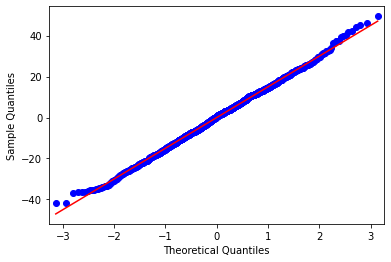

In [11]:
fig = sm.qqplot(res,line = 's') 

In [12]:
import seaborn as sns

In [13]:
### Normality Assumption check
from scipy import stats

#using the Shapiro-wilk test
w_shapiro, pvalue_shapiro = stats.shapiro(res)
print(pvalue_shapiro)

0.33162370324134827


D:\program\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

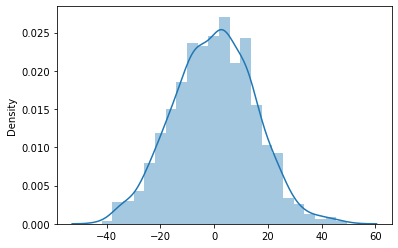

In [15]:
sns.distplot(res,bins = 'auto',hist = True)

**Homogeneity for equal variances check**

In [25]:
# Using Bartlett's test
w_bartlett, pvalue_bartlett = stats.bartlett(df['value'][df['treatments'] == 'Less than HS']
 ,df['value'][df['treatments'] == 'HS']
 ,df['value'][df['treatments'] == 'Jr Coll']
 ,df['value'][df['treatments'] == "Bachelor's"]
 ,df['value'][df['treatments'] == "Graduate"])
print("Bartlett's test:\tw:{:7.4f}, pvalue:{:7.4f}".format(w_bartlett, pvalue_bartlett))

#Using Levene Variance test
w_levene, pvalue_levene = stats.levene(df['value'][df['treatments'] == 'Less than HS']
 ,df['value'][df['treatments'] == 'HS']
 ,df['value'][df['treatments'] == 'Jr Coll']
 ,df['value'][df['treatments'] == "Bachelor's"]
 ,df['value'][df['treatments'] == "Graduate"])
print("Levene's test:\tw:{:7.4f}, pvalue:{:7.4f}".format(w_levene, pvalue_levene))


Levene's test:	w: 5.7617, pvalue: 0.0001


### 4 Analysis Results & Explanation

**RESULTS**:

In [27]:
anova_table

,sum_sq,df,F,PR(>F),EtaSq
C(treatments),4176.452688,4.0,4.618904,0.001056,0.015585
Residual,263802.838942,1167.0,NaN,NaN,NaN


Multiple Pairwise Comparisons and Turkey HSD test:

In [13]:
print(mc_results)
pair_t.result_frame

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Bachelor's     Graduate   1.4968 0.8514   -2.693  5.6867  False
Bachelor's           HS  -2.0975 0.3547  -5.2215  1.0265  False
Bachelor's      Jr Coll  -1.0063    0.9  -5.9117  3.8992  False
Bachelor's Less than HS  -5.5668 0.0074  -10.107 -1.0266   True
  Graduate           HS  -3.5943 0.0664  -7.3327  0.1441  False
  Graduate      Jr Coll  -2.5031 0.6756   -7.821  2.8148  False
  Graduate Less than HS  -7.0636 0.0011 -12.0466 -2.0807   True
        HS      Jr Coll   1.0912    0.9  -3.4348  5.6172  False
        HS Less than HS  -3.4693 0.1466  -7.5966   0.658  False
   Jr Coll Less than HS  -4.5605 0.1711 -10.1587  1.0376  False
---------------------------------------------------------------


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Graduate-Bachelor's,1.496838,1.533586,0.976038,0.329248,-1.512057,4.505733,0.698223,False
HS-Bachelor's,-2.097484,1.143460,-1.834331,0.066859,-4.340952,0.145984,0.292485,False
Jr Coll-Bachelor's,-1.006255,1.795528,-0.560423,0.575299,-4.529079,2.516569,0.760113,False
Less than HS-Bachelor's,-5.566798,1.661832,-3.349796,0.000835,-8.827311,-2.306286,0.007486,True
HS-Graduate,-3.594322,1.368362,-2.626733,0.008734,-6.279048,-0.909597,0.067772,False
Jr Coll-Graduate,-2.503093,1.946493,-1.285950,0.198716,-6.322110,1.315924,0.587763,False
Less than HS-Graduate,-7.063636,1.823897,-3.872826,0.000114,-10.642120,-3.485153,0.001135,True
Jr Coll-HS,1.091230,1.656638,0.658701,0.510218,-2.159092,4.341551,0.760113,False
Less than HS-HS,-3.469314,1.510700,-2.296494,0.021824,-6.433306,-0.505322,0.143123,False
Less than HS-Jr Coll,-4.560544,2.049057,-2.225679,0.026226,-8.580791,-0.540296,0.147393,False


Normality check using Shapiro-Wilk test:

In [30]:
print("Shapiro-wilk's test:\tw:{:7.4f}, pvalue:{:7.4f}".format(w_shapiro, pvalue_shapiro))
print("Bartlett's test:\tw:{:7.4f}, pvalue:{:7.4f}".format(w_bartlett, pvalue_bartlett))
print("Levene's test:\tw:{:7.4f}, pvalue:{:7.4f}".format(w_levene, pvalue_levene))

Shapiro-wilk's test:	w: 0.9984, pvalue: 0.3316
Bartlett's test:	w:17.7424, pvalue: 0.0014
Levene's test:	w: 5.7617, pvalue: 0.0001


**ANALYSIS & EXPLANATION:**
1. From Anova table, we find F has a score of 4.618904 and p-value is 0.001056. 
Since p-value is less than significance value(0.05), we reject Null Hypothesis and conclude that the mean values of various levels of education are not same.

2. Since we know that all means are not same, we need to determine which means are different. For that, t-test and Tukey HSD are used.

3. Using t-test, we performed multiple pairwise comparisons and found that for groups Less than HS -- Bachelor's and Less than HS -- Graduate have different means. We got True values in the reject column. The p-values of these two groups are 0.007486 and 0.001135 respectively. Since these p-values are less than significance level(0.05), we conclude that the means for these two groups are different.

4. Using Tukey HSD test, we also got the same results as t-test. We got True values in the reject column. For groups, Less than HS -- Bachelor's and Less than HS -- Graduate, the p-values (0.0074 and 0.0011) are less than significance level, so we reject null hypothesis and conclude that the means of these two groups are different. 

5. Normality check: In the qq plot, we see the sample observations from the data set closely follow the theoretical quantities, therefore concluding that the given data is normal. Also the plot from the histogram, we find that the data is normally distributed. The p-value(0.33162370324134827) from the Shapiro-Wilk test is greater than significance level(0.05). Therefore, the given data is normally distributed.

6. Homogeneity for equal variances test: From Bartlett's test and Levene's test, we got p-values of 0.0014 and 0.0001 respectively. We find that these p-vaues are less than significance level(0.05). Therefore, we reject null hypothesis concluding that variances of different groups are not equal. Here, Homogeneity for equal variances gtest is failed.

### 5 Conclusion

#### According to the results of one-way ANOVA and Multiple Pairwise Comparisons and Turkey HSD test, we can see the group of 'Less than HS' has a significent difference with the two groups of "Bachelor's" and 'Graduate'. 
#### Also, the data is a normal distribution. 